Here’s a step-by-step guide for Customer Segmentation using Wholesale Customer Data (an unsupervised learning project). We’ll use K-Means Clustering and PCA for visualization.

**Step 1**: Load and Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


Key Features:

Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen (annual spending in monetary units).

Channel (1=HoReCa [Hotel/Restaurant/Cafe], 2=Retailer).

Region (Lisbon, Porto, etc.).

**Step 2**: Preprocess Data

In [2]:
# Drop non-continuous features (we'll use these later for validation)
X = data.drop(['Channel', 'Region'], axis=1)

# Standardize data (K-Means is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Step 3**: Find Optimal Clusters (Elbow Method)

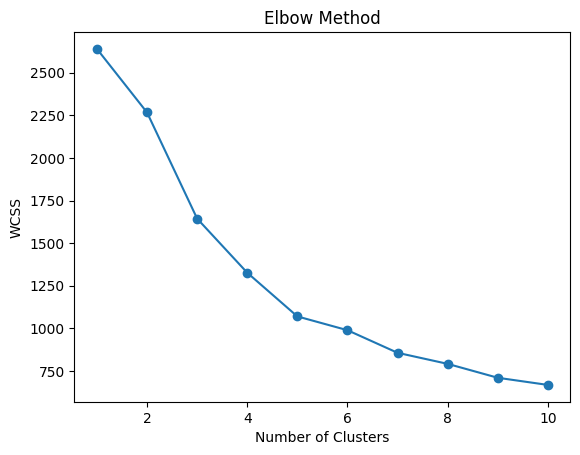

In [3]:
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Interpretation: Look for the "elbow" (likely at k=3 or k=4).

**Step 4**: Apply K-Means Clustering

In [4]:
# Choose k=3 (adjust based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters back to original data
data['Cluster'] = clusters
print(data.groupby('Cluster').mean())

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


**Step 5**: Visualize Clusters with PCA

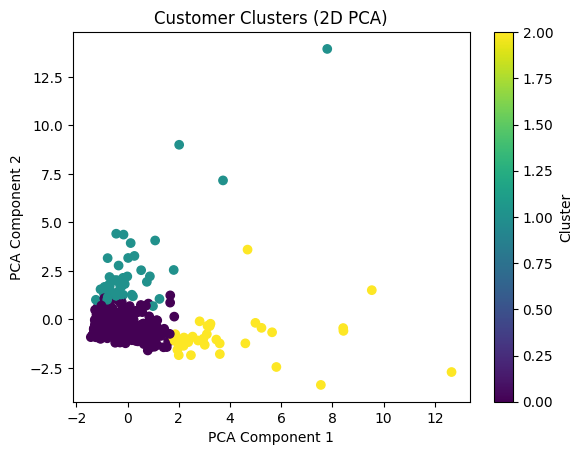

In [5]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters (2D PCA)')
plt.colorbar(label='Cluster')
plt.show()

**Step 6**: Analyze Clusters

Check the mean spending per cluster:

In [6]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


**Step 7**: Validate with Original Labels

Compare clusters with Channel (1=HoReCa, 2=Retail)

In [7]:
pd.crosstab(data['Cluster'], data['Channel'])

Channel,1,2
Cluster,,
0,251,99
1,47,6
2,0,37


**Key Takeaways:**
* Unsupervised Learning: No labels needed, just patterns.

* PCA: Essential for visualizing high-dimensional data.

* Business Use Case: Tailor marketing strategies per cluster.